# Data Plotting

This notebook provides a tutorial for plotting the output of tidy3d simulations.

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.append('../../tidy3d')
import tidy3d as td
import tidy3d.web as web

## Setup

### Creating Simulation

First, let's make a `td.Simulation` so we have data to plot.

In [2]:
# make samplers that define the freq and time domain measurement
freqs = np.linspace(1e14, 3e14, 101)
num_modes = 3

simulation = td.Simulation(
    size=(5.0, 5.0, 5.0),
    grid_size=(0.05, 0.05, 0.05),
    run_time = 4e-13,
    pml_layers = 3*[td.PML()],
    structures = [
        td.Structure(
            geometry=td.Box(center=(0,0,0), size=(10001,1.5,1.5)),
            medium=td.Medium(permittivity=2),
            name='waveguide'
        ),
        td.Structure(
            geometry=td.Box(center=(0,.5,.5), size=(1.5,1.5,1.5)),
            medium=td.Medium(permittivity=2),
            name='scatterer'
        ),        
    ],
    sources=[td.ModeSource(
        source_time=td.GaussianPulse(freq0=2e14, fwidth=2e13),
        center=(-2.0, 0.0, 0.0),
        size=(0.0, 4, 4),
        direction='+',
        mode=td.Mode(mode_index=0)
    )],
    monitors=[
        td.FieldMonitor(
            fields=['Ex', 'Ey', 'Ez'],
            size=(5, 0, 5),
            center=(0,0,0),
            freqs=freqs,
            name='field'),
        td.FieldTimeMonitor(
            size=(5, 0, 5),
            center=(0,0,0),
            interval=30,
            name='field_time'),
        td.FluxMonitor(
            size=(0,4,4),
            center=(2,0,0),
            freqs=freqs, 
            name='flux'),
        td.FluxTimeMonitor(
            size=(0,4,4),
            center=(2,0,0),
            interval=10,
            name='flux_time'),
        td.ModeMonitor(
            size=(0,4,4),
            center=(2,0,0),
            freqs=freqs,
            modes=[td.Mode(mode_index=i) for i in range(num_modes)], 
            name='mode')
    ],
)

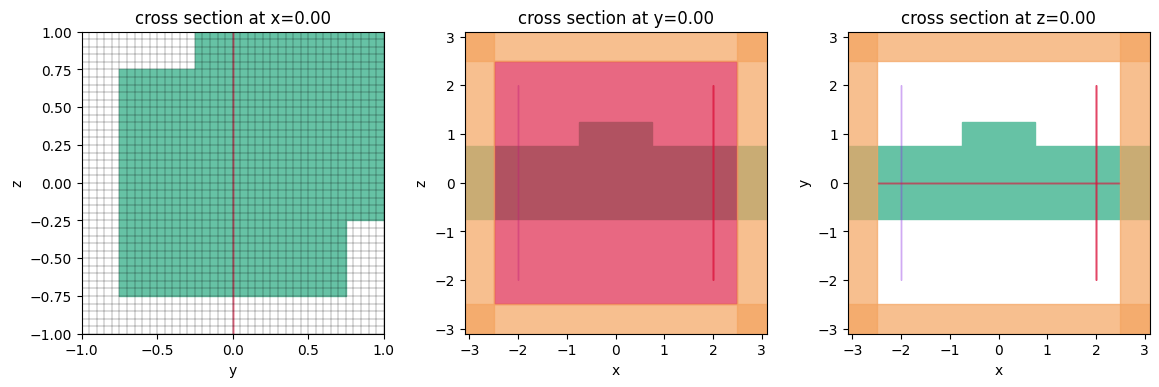

In [3]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
simulation.plot(x=0.0, ax=ax1)
simulation.plot_grid(x=0, ax=ax1)
ax1.set_ylim(-1, 1)
ax1.set_xlim(-1, 1)
simulation.plot(y=0.0, ax=ax2)
simulation.plot(z=0.0, ax=ax3)
plt.show()

In [4]:
# get rid of scatterer for normalization 
simulation0 = simulation.copy(deep=True)
simulation0.structures = [simulation.structures[0]]

# sim0_data = web.run(simulation0, task_name='straight waveguide', path='data/simulation.hdf5')
# sim_data = web.run(simulation, task_name='scattered waveguide', path='data/simulation.hdf5')
sim0_data = web.load_data('a0327a3f-8ee5-442e-aac8-6beecfa3c5d0', simulation, path='data/simulation.hdf5')
sim_data = web.load_data('abe8fe33-ac97-4894-bf2d-1ec10091ee4b', simulation, path='data/simulation.hdf5')

print(sim_data.log)

[12:25:28] INFO     downloading file "simulation.json" to                       ]8;id=324850;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/simulation.json"

Output()

[12:25:29] INFO     downloading file "monitor_data.hdf5" to                     ]8;id=733911;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/monitor_data.hdf5"

Output()

[12:25:36] INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=16456;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393

Output()

[12:25:37] INFO     exporting SimulationData to data/simulation.hdf5            ]8;id=857000;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:266

           INFO     loading SimulationData from data/simulation.hdf5            ]8;id=128193;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:302

           INFO     downloading file "simulation.json" to                       ]8;id=363624;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/simulation.json"

Output()

[12:25:38] INFO     downloading file "monitor_data.hdf5" to                     ]8;id=674427;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/monitor_data.hdf5"

Output()

[12:25:45] INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=50035;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393

Output()

           INFO     exporting SimulationData to data/simulation.hdf5            ]8;id=606486;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:266

           INFO     loading SimulationData from data/simulation.hdf5            ]8;id=335224;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:302

Simulation domain Nx, Ny, Nz: [124, 124, 124]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 1.9066e+06.
Using subpixel averaging: True
Number of time steps: 4616
Automatic shutoff factor: 1.00e-05
Time step (s): 8.6662e-17

Get source modes time (s):    0.7198
Get monitor modes time (s):   2.4758
Rest of setup time (s):       0.0399

Starting solver...
- Time step    184 / time 1.59e-14s (  4 % done), field decay: 1.00e+00
- Time step    369 / time 3.20e-14s (  8 % done), field decay: 1.00e+00
- Time step    459 / time 3.98e-14s (  9 % done), field decay: 1.00e+00
- Time step    553 / time 4.79e-14s ( 12 % done), field decay: 1.00e+00
- Time step    738 / time 6.40e-14s ( 16 % done), field decay: 5.11e-01
- Time step    923 / time 8.00e-14s ( 20 % done), field decay: 2.16e-03
- Time step   1107 / time 9.59e-14s ( 24 % done), field decay: 3.00e-06
Field decay smaller than shutoff factor, exiting solver.

Solver time (s):              1.7890
Post-processing time (s):

## Plotting

Here we show how to plot data from each monitor

### Flux Data

`td.FluxData` and `td.FluxTimeData` is the simplest because it just stores the electromagnetic power flux through a surface as a function of the frequency and time, respectively.

First, we access the `td.MonitorData` through the dictionary `sim_data.monitor_data`.

In [5]:
# get the flux data from that monitor name
flux_data = sim_data['flux'] / sim0_data['flux']
flux_time_data = sim_data['flux_time']

and we can plot the values using the `td.MonitorData.plot()` method.

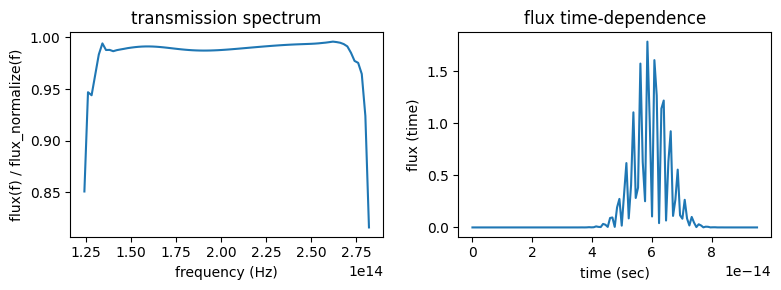

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(8,3))
flux_data.real.plot(ax=ax1)
flux_time_data.plot(ax=ax2)
ax1.set_ylabel('flux(f) / flux_normalize(f)')
ax1.set_xlabel('frequency (Hz)')
ax1.set_title('transmission spectrum')
ax2.set_ylabel('flux (time)')
ax2.set_xlabel('time (sec)')
ax2.set_title('flux time-dependence')


plt.show()

## Plotting Mode Data

The axes of mode data correspond to direction (+/-), mode_index, and sampler axes. 

To pot all of this data, we make two subplots and use the builting `.sel()` function to select the data to plot in each axis.

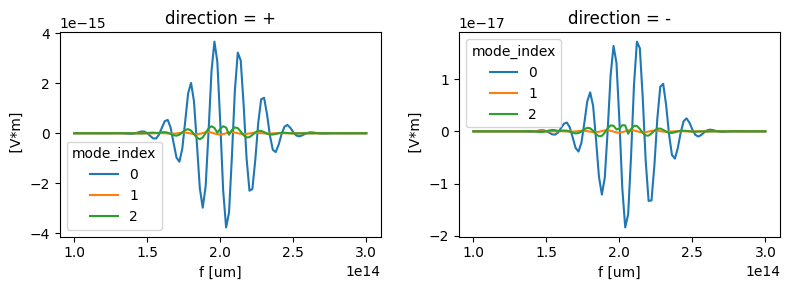

In [7]:
# tip: you can also get the monitor data directly by indexing it's name in `SimulationData`
mode_data = sim_data['mode'] 

f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(8, 3))

mode_data.sel(direction='+').real.plot.line(x='f', ax=ax1)
mode_data.sel(direction='-').real.plot.line(x='f', ax=ax2)
plt.show()


### Plotting Fields

Let's grab the field data and plot.

In [8]:
field_data = sim_data['field']

#### Electromagnetic Fields

In [9]:
# get the field data on the z=1.0 plane at frequency 200THz
field_data = field_data.interp(f=200e12).sel(y=0)

In [10]:
field_data.Ey.attrs = {'units':'V/m'}
field_data.Ey.x.attrs = {'units': 'um'}

In [11]:
field_data.Ey.x

<xarray.DataArray 'x' (x: 100)>
array([-2.5 , -2.449495, -2.39899 , -2.348485, -2.29798 , -2.247475,
 -2.19697 , -2.146465, -2.09596 , -2.045455, -1.994949, -1.944444,
 -1.893939, -1.843434, -1.792929, -1.742424, -1.691919, -1.641414,
 -1.590909, -1.540404, -1.489899, -1.439394, -1.388889, -1.338384,
 -1.287879, -1.237374, -1.186869, -1.136364, -1.085859, -1.035354,
 -0.984848, -0.934343, -0.883838, -0.833333, -0.782828, -0.732323,
 -0.681818, -0.631313, -0.580808, -0.530303, -0.479798, -0.429293,
 -0.378788, -0.328283, -0.277778, -0.227273, -0.176768, -0.126263,
 -0.075758, -0.025253, 0.025253, 0.075758, 0.126263, 0.176768,
 0.227273, 0.277778, 0.328283, 0.378788, 0.429293, 0.479798,
 0.530303, 0.580808, 0.631313, 0.681818, 0.732323, 0.782828,
 0.833333, 0.883838, 0.934343, 0.984848, 1.035354, 1.085859,
 1.136364, 1.186869, 1.237374, 1.287879, 1.338384, 1.388889,
 1.439394, 1.489899, 1.540404, 1.590909, 1.641414, 1.691919,
 1.742424, 1.792929, 1.843434, 1.893939, 1.944444, 1.994949,
 2.045455, 2.09596 , 2.146465, 2.19697 , 2.247475, 2.29798 ,
 2.348485, 2.39899 , 2.449495, 2.5 ])
Coordinates:
 * x (x) float64 -2.5 -2.449 -2.399 -2.348 ... 2.348 2.399 2.449 2.5
 y float64 0.0
 f float64 2e+14
Attributes:
 units: um xarray.DataArray 'x' x : 100 -2.5 -2.449 -2.399 -2.348 -2.298 ... 2.298 2.348 2.399 2.449 2.5 array([-2.5 , -2.449495, -2.39899 , -2.348485, -2.29798 , -2.247475,
 -2.19697 , -2.146465, -2.09596 , -2.045455, -1.994949, -1.944444,
 -1.893939, -1.843434, -1.792929, -1.742424, -1.691919, -1.641414,
 -1.590909, -1.540404, -1.489899, -1.439394, -1.388889, -1.338384,
 -1.287879, -1.237374, -1.186869, -1.136364, -1.085859, -1.035354,
 -0.984848, -0.934343, -0.883838, -0.833333, -0.782828, -0.732323,
 -0.681818, -0.631313, -0.580808, -0.530303, -0.479798, -0.429293,
 -0.378788, -0.328283, -0.277778, -0.227273, -0.176768, -0.126263,
 -0.075758, -0.025253, 0.025253, 0.075758, 0.126263, 0.176768,
 0.227273, 0.277778, 0.328283, 0.378788, 0.429293, 0.479798,
 0.530303, 0.580808, 0.631313, 0.681818, 0.732323, 0.782828,
 0.833333, 0.883838, 0.934343, 0.984848, 1.035354, 1.085859,
 1.136364, 1.186869, 1.237374, 1.287879, 1.338384, 1.388889,
 1.439394, 1.489899, 1.540404, 1.590909, 1.641414, 1.691919,
 1.742424, 1.792929, 1.843434, 1.893939, 1.944444, 1.994949,
 2.045455, 2.09596 , 2.146465, 2.19697 , 2.247475, 2.29798 ,
 2.348485, 2.39899 , 2.449495, 2.5 ]) Coordinates: (3) x (x) float64 -2.5 -2.449 -2.399 ... 2.449 2.5 units : um array([-2.5 , -2.449495, -2.39899 , -2.348485, -2.29798 , -2.247475,
 -2.19697 , -2.146465, -2.09596 , -2.045455, -1.994949, -1.944444,
 -1.893939, -1.843434, -1.792929, -1.742424, -1.691919, -1.641414,
 -1.590909, -1.540404, -1.489899, -1.439394, -1.388889, -1.338384,
 -1.287879, -1.237374, -1.186869, -1.136364, -1.085859, -1.035354,
 -0.984848, -0.934343, -0.883838, -0.833333, -0.782828, -0.732323,
 -0.681818, -0.631313, -0.580808, -0.530303, -0.479798, -0.429293,
 -0.378788, -0.328283, -0.277778, -0.227273, -0.176768, -0.126263,
 -0.075758, -0.025253, 0.025253, 0.075758, 0.126263, 0.176768,
 0.227273, 0.277778, 0.328283, 0.378788, 0.429293, 0.479798,
 0.530303, 0.580808, 0.631313, 0.681818, 0.732323, 0.782828,
 0.833333, 0.883838, 0.934343, 0.984848, 1.035354, 1.085859,
 1.136364, 1.186869, 1.237374, 1.287879, 1.338384, 1.388889,
 1.439394, 1.489899, 1.540404, 1.590909, 1.641414, 1.691919,
 1.742424, 1.792929, 1.843434, 1.893939, 1.944444, 1.994949,
 2.045455, 2.09596 , 2.146465, 2.19697 , 2.247475, 2.29798 ,
 2.348485, 2.39899 , 2.449495, 2.5 ]) y () float64 0.0 units : um array(0.) f () float64 2e+14 units : um array(2.e+14) Attributes: (1) units : um

##### Amplitude Plots

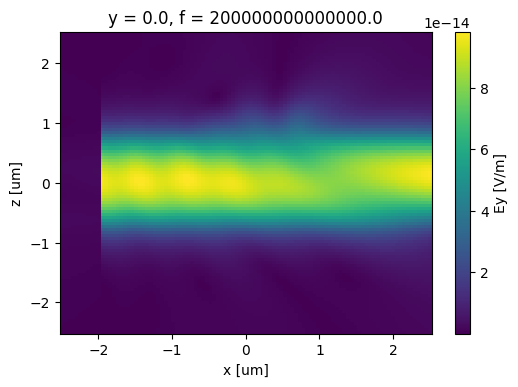

In [12]:
# amplitude plot rz Ex(x,y) field on plane
field_data.Ey.pipe(abs).plot(x='x', y='z')
plt.show()

##### Quiver Plots

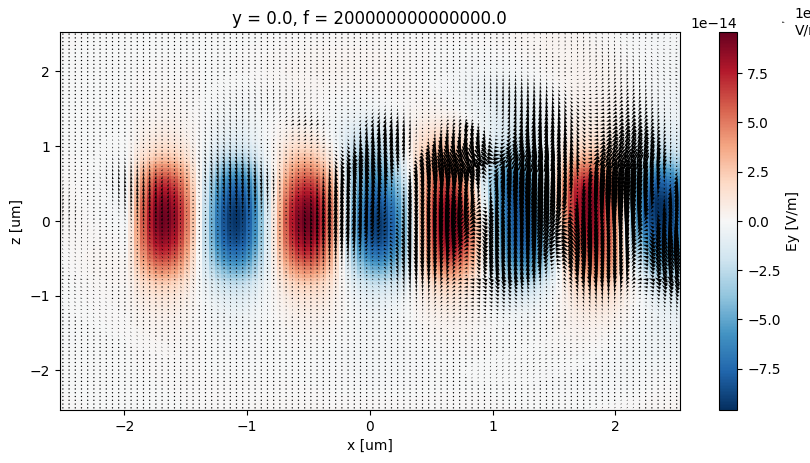

In [13]:
# quiver plot of E_{x,y}(x,y) on plane with Ez(x,y) underlying.
f, ax = plt.subplots(figsize=(10, 5))
field_data.Ey.real.plot(x='x', y='z', ax=ax)
field_data.real.plot.quiver('x', 'z', 'Ez', 'Ex', ax=ax)
plt.show()

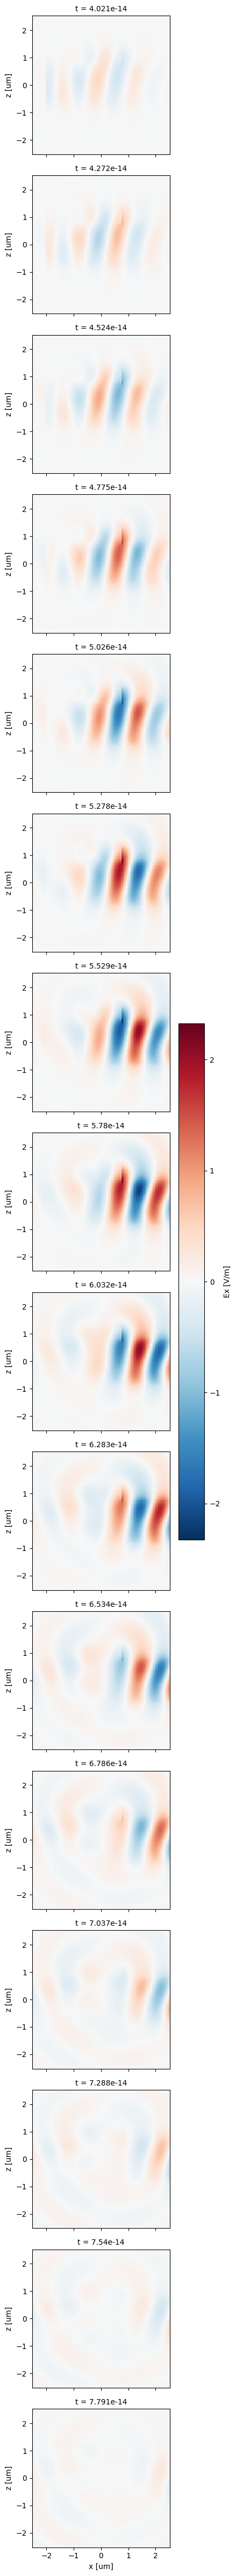

In [24]:
field_time_data = sim_data['field_time']

time_data = field_time_data.sel(y=0, t=slice(4e-14, 8e-14))

_ = time_data.Ex.T.plot(row='t')

##### Structure Overlay
One can overlay the structure permittivity by calling `plot_fields` from the `td.SimulationData` object as follows:

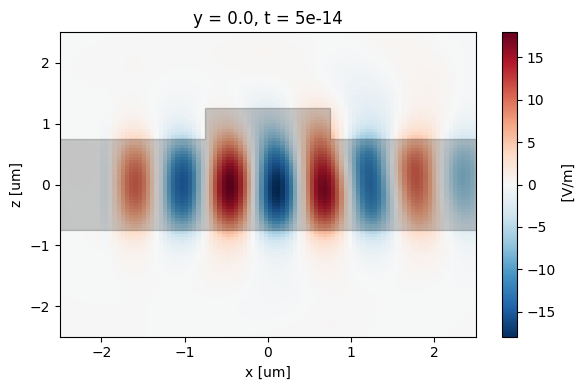

In [28]:
ax = sim_data.plot_field('field_time', 'Ey', y=0.0, time=5e-14, freq=200e12, eps_alpha=0.2)

#### Permittivity

If we've stored permittivity by specifing `eps_xx`, `eps_yy` or `eps_zz` in the `FieldMonitor`'s `fields`, we can access them and plot as follows.

In [16]:
# eps_xx = field_data.eps_xx
# xx_component_plane = eps_xx.interp(z=1.0, f=7.5)
# xx_component_plane.real.plot(cmap='gist_yarg')
# plt.show()

## Tricks and Tips

Keyword arguments are passed to the correponding `.plot()` calls internally, so you can customize the plots.

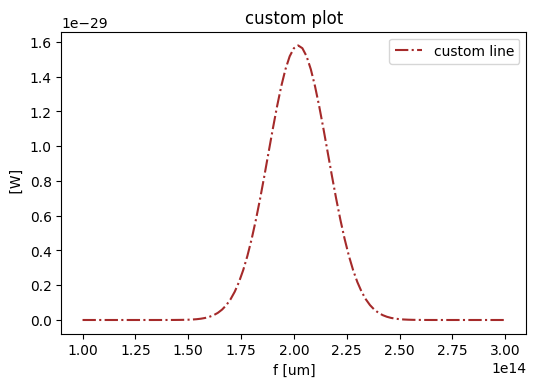

In [17]:
sim_data['flux'].plot(color='brown', linestyle='-.', label='custom line')
plt.legend()
plt.title('custom plot')
plt.show()